# Desafio Netflix - Sistema de Recomendação de Filmes
Este notebook implementa um sistema de recomendação simples com base em um dataset de avaliações de filmes.

## Objetivo
Prever a nota que um usuário daria a um filme que ele ainda não assistiu. Para isso, usamos uma matriz de avaliações e aplicamos fatoração de matrizes para inferir a relação entre perfis de usuários e filmes.

## Etapas
1. Carregamento e preparação dos dados
2. Decomposição da matriz em componentes de perfis de usuários e filmes
3. Adição de ruído para simular o desconhecimento de uma avaliação
4. Previsão da avaliação "oculta"
5. Avaliação do erro de predição


In [1]:
!kaggle datasets download -d rounakbanik/the-movies-dataset 

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
100%|███████████████████████████████████████▊| 227M/228M [00:21<00:00, 9.05MB/s]
100%|████████████████████████████████████████| 228M/228M [00:21<00:00, 11.0MB/s]


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.linalg import svd

plt.style.use('ggplot')


In [3]:
import zipfile
import os

zip_file_path = 'the-movies-dataset.zip'

extract_to = 'data'

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

os.remove(zip_file_path)

In [4]:
df = pd.read_csv('data/ratings_small.csv')

A = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
print("Matriz de Avaliações (A):")
A.head()


Matriz de Avaliações (A):


movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
U, sigma, Vt = svd(A, full_matrices=False)

k = 20
U_k = U[:, :k]
sigma_k = np.diag(sigma[:k])
Vt_k = Vt[:k, :]

A_approx = np.dot(U_k, np.dot(sigma_k, Vt_k))

print("Aproximação da matriz A usando SVD com k perfis:", A_approx.shape)


Aproximação da matriz A usando SVD com k perfis: (671, 9066)


In [6]:
i, j = random.choice(range(A.shape[0])), random.choice(range(A.shape[1]))
original_value = A.iloc[i, j]
A_noisy = A.copy()
A_noisy.iloc[i, j] = np.random.rand() * 5

predicted_value = A_approx[i, j]

print(f"Valor Original: {original_value}, Valor Predito: {predicted_value}")


Valor Original: 0.0, Valor Predito: -0.011761611874762833


In [7]:
num_experimentos = 1000
erros = []

while len(erros) < num_experimentos:
    i = np.random.randint(0, A.shape[0])
    j = np.random.randint(0, A.shape[1])
    
    original_value = A.iloc[i, j]
    
    if original_value == 0:
        continue
    
    A_corrupted = A.copy()
    A_corrupted.iloc[i, j] = np.random.uniform(0, 5)
    
    predicted_value = np.dot(U_k[i, :], np.dot(sigma_k, Vt_k[:, j]))
    
    error = original_value - predicted_value
    erros.append(error)
    
print("Erros calculados:", len(erros))


Erros calculados: 1000


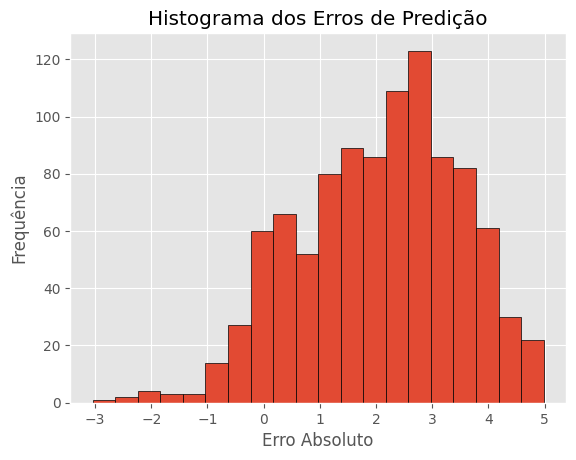

In [8]:
plt.hist(erros, bins=20, edgecolor='black')
plt.title('Histograma dos Erros de Predição')
plt.xlabel('Erro Absoluto')
plt.ylabel('Frequência')
plt.show()
